In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.preprocessing.image as ImageDataGenerator


In [2]:
import tensorflow as tf

# Load .h5 model
model = tf.keras.models.load_model('plant_model.h5')

# Now you can use model_h5 for inference


2024-06-28 12:29:30.537477: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-06-28 12:29:30.537507: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-28 12:29:30.537511: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-28 12:29:30.538049: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-28 12:29:30.538719: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_67 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_68 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_69 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                

In [4]:
!pip install opencv-python

In [5]:
import cv2
import matplotlib.pyplot as plt
image_path = ('test/test/AppleCedarRust2.JPG')

# To Read Image
img = cv2.imread(image_path)

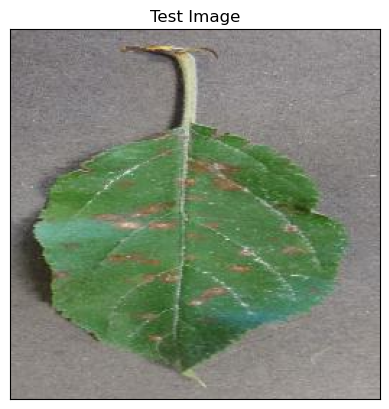

In [6]:
# Now to convert BGR image to RGB image

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [7]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr)

[[[[132. 128. 129.]
   [136. 132. 133.]
   [121. 117. 118.]
   ...
   [160. 156. 157.]
   [153. 149. 150.]
   [159. 155. 156.]]

  [[120. 116. 117.]
   [122. 118. 119.]
   [108. 104. 105.]
   ...
   [154. 150. 151.]
   [153. 149. 150.]
   [153. 149. 150.]]

  [[107. 103. 104.]
   [109. 105. 106.]
   [130. 126. 127.]
   ...
   [153. 149. 150.]
   [152. 148. 149.]
   [143. 139. 140.]]

  ...

  [[142. 137. 133.]
   [141. 136. 132.]
   [145. 140. 136.]
   ...
   [160. 155. 152.]
   [163. 158. 155.]
   [166. 161. 158.]]

  [[140. 135. 131.]
   [138. 133. 129.]
   [143. 138. 134.]
   ...
   [161. 156. 153.]
   [163. 158. 155.]
   [165. 160. 157.]]

  [[138. 133. 129.]
   [134. 129. 125.]
   [143. 138. 134.]
   ...
   [167. 162. 159.]
   [166. 161. 158.]
   [164. 159. 156.]]]]


In [8]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 267ms/step


2024-06-28 12:29:34.343808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


(array([[2.2558158e-13, 8.7767033e-13, 9.9999988e-01, 3.9858029e-17,
         1.4047692e-17, 3.9853815e-15, 4.5613464e-19, 3.5105444e-08,
         2.4610187e-19, 8.2990272e-15, 1.2169404e-27, 8.5513125e-09,
         5.6346000e-10, 6.4251545e-17, 2.7656706e-17, 4.2927685e-15,
         1.5160173e-10, 1.9635487e-18, 1.5683872e-12, 3.0335449e-18,
         3.7597952e-13, 4.6139816e-14, 1.7384418e-16, 1.4905665e-19,
         3.1984063e-19, 7.3613239e-20, 1.6471548e-16, 9.3748269e-25,
         7.5455461e-08, 6.3034302e-09, 5.3862800e-11, 9.5175836e-19,
         8.7396566e-12, 3.9098100e-19, 6.1768139e-11, 1.4891748e-18,
         1.5918842e-18, 2.4824812e-17]], dtype=float32),
 (1, 38))

In [9]:
class_names = [
    'Apple Scab',
    'Apple Black Rot',
    'Cedar Apple Rust',
    'Apple Healthy',
    'Blueberry Healthy',
    'Cherry Powdery Mildew',
    'Cherry Healthy',
    'Corn Cercospora Leaf Spot Gray Leaf Spot',
    'Corn Common Rust ',
    'Corn Northern Leaf Blight',
    'Corn Healthy',
    'Grape Black Rot',
    'Grape Esca (Black Measles)',
    'Grape Leaf Blight (Isariopsis Leaf Spot)',
    'Grape Healthy',
    'Orange Haunglongbing (Citrus Greening)',
    'Peach Bacterial Spot',
    'Peach Healthy',
    'Pepper, Bell Bacterial Spot',
    'Pepper, Bell Healthy',
    'Potato Early Blight',
    'Potato Late Blight',
    'Potato Healthy',
    'Raspberry Healthy',
    'Soybean Healthy',
    'Squash Powdery Mildew',
    'Strawberry Leaf Scorch',
    'Strawberry Healthy',
    'Tomato Bacterial Spot',
    'Tomato Early Blight',
    'Tomato Late Blight',
    'Tomato Leaf Mold',
    'Tomato Septoria Leaf Spot',
    'Tomato Spider Mites Two-Spotted Spider Mite',
    'Tomato Target Spot',
    'Tomato Yellow Leaf Curl Virus',
    'Tomato Mosaic Virus',
    'Tomato Healthy'
]

In [10]:
# Example prediction result (replace with your actual prediction result)
result = np.argmax(prediction)



In [11]:
plant_disease_cures = [
    [
        "1. Use fungicides such as captan or myclobutanil.",
        "2. Remove and destroy infected leaves and fruit.",
        "3. Prune trees to improve air circulation.",
        "4. Avoid overhead irrigation to reduce leaf wetness.",
        "5. Apply dormant oil to control overwintering fungal spores."
    ],
    [
        "1. Prune trees for better air circulation.",
        "2. Remove and destroy infected fruit and leaves.",
        "3. Apply fungicides like myclobutanil or pyraclostrobin.",
        "4. Use copper sprays during the growing season.",
        "5. Maintain good orchard hygiene to reduce overwintering spores."
    ],
    [
        "1. Remove cedar trees near apple orchards if possible.",
        "2. Apply fungicides like triadimefon or myclobutanil.",
        "3. Prune apple trees to improve air circulation.",
        "4. Apply sulfur sprays during the growing season.",
        "5. Remove and destroy any infected leaves or fruit."
    ],
    [
        "No specific treatment needed; maintain good orchard practices."
    ],
    [
        "No specific treatment needed; maintain good cultural practices."
    ],
    [
        "1. Apply fungicides like sulfur or potassium bicarbonate.",
        "2. Prune trees to improve air circulation.",
        "3. Remove and destroy infected leaves and shoots.",
        "4. Apply neem oil to suppress fungal growth.",
        "5. Avoid overhead irrigation to reduce leaf wetness."
    ],
    [
        "No specific treatment needed; maintain good orchard practices."
    ],
    [
        "1. Use fungicides like chlorothalonil or mancozeb.",
        "2. Rotate crops to reduce disease carryover.",
        "3. Plant resistant varieties if available.",
        "4. Remove and destroy infected leaves and debris.",
        "5. Apply copper-based sprays during humid conditions."
    ],
    [
        "1. Plant resistant corn varieties if available.",
        "2. Apply fungicides like triazole or strobilurin.",
        "3. Rotate crops and practice good field hygiene.",
        "4. Remove and destroy infected crop residues.",
        "5. Ensure proper plant spacing for better air circulation."
    ],
    [
        "1. Apply fungicides like azoxystrobin or pyraclostrobin.",
        "2. Rotate crops to break disease cycles.",
        "3. Use resistant corn hybrids if available.",
        "4. Remove and destroy infected leaves and debris.",
        "5. Avoid excessive nitrogen fertilization."
    ],
    [
        "No specific treatment needed; maintain good agricultural practices."
    ],
    [
        "1. Apply fungicides like captan or myclobutanil.",
        "2. Remove and destroy infected fruit clusters.",
        "3. Prune vines to improve air circulation.",
        "4. Apply dormant oil to reduce overwintering spores.",
        "5. Practice good vineyard sanitation."
    ],
    [
        "1. Remove and destroy infected grapevine wood.",
        "2. Apply systemic fungicides like fosetyl-aluminum.",
        "3. Prune vines to remove diseased parts.",
        "4. Practice delayed pruning to reduce infection risk.",
        "5. Use resistant grape varieties if available."
    ],
    [
        "1. Apply fungicides like azoxystrobin or myclobutanil.",
        "2. Prune vines for better sunlight and air circulation.",
        "3. Remove and destroy infected leaves and canes.",
        "4. Apply sulfur sprays during the growing season.",
        "5. Avoid overhead irrigation to reduce leaf wetness."
    ],
    [
        "No specific treatment needed; maintain good vineyard management."
    ],
    [
        "1. Use insecticides to control citrus psyllids.",
        "2. Remove and destroy infected trees.",
        "3. Apply antibiotics like streptomycin if available.",
        "4. Practice integrated pest management (IPM) techniques.",
        "5. Plant disease-free nursery stock."
    ],
    [
        "1. Apply copper-based fungicides during the growing season.",
        "2. Prune trees to improve air circulation.",
        "3. Remove and destroy infected twigs and branches.",
        "4. Apply fixed copper sprays during dormant season.",
        "5. Avoid overhead irrigation to reduce disease spread."
    ],
    [
        "No specific treatment needed; maintain good orchard practices."
    ],
    [
        "1. Apply copper-based fungicides during the growing season.",
        "2. Rotate crops to reduce disease pressure.",
        "3. Use disease-resistant pepper varieties if available.",
        "4. Remove and destroy infected plant debris.",
        "5. Apply drip irrigation to avoid wetting foliage."
    ],
    [
        "No specific treatment needed; maintain good agricultural practices."
    ],
    [
        "1. Apply fungicides like chlorothalonil or mancozeb.",
        "2. Rotate crops to reduce disease build-up in soil.",
        "3. Remove and destroy infected foliage and tubers.",
        "4. Mulch around plants to prevent soil splashing.",
        "5. Use disease-resistant potato varieties if available."
    ],
    [
        "1. Apply fungicides like copper-based sprays or mancozeb.",
        "2. Practice crop rotation to break disease cycles.",
        "3. Remove and destroy infected plant parts promptly.",
        "4. Keep foliage dry by avoiding overhead irrigation.",
        "5. Apply protective fungicides preventively during humid weather."
    ],
    [
        "No specific treatment needed; maintain good agricultural practices."
    ],
    [
        "No specific treatment needed; maintain good orchard practices."
    ],
    [
        "No specific treatment needed; maintain good agricultural practices."
    ],
    [
        "1. Apply fungicides like sulfur or potassium bicarbonate.",
        "2. Remove and destroy infected leaves and vines.",
        "3. Prune plants to improve air circulation.",
        "4. Apply neem oil or horticultural oil to suppress fungal growth.",
        "5. Avoid overhead irrigation to reduce leaf wetness."
    ],
    [
        "1. Apply copper-based fungicides during the growing season.",
        "2. Remove and destroy infected leaves and runners.",
        "3. Prune plants to increase air circulation.",
        "4. Apply drip irrigation to keep foliage dry.",
        "5. Use disease-resistant strawberry varieties if available."
    ],
    [
        "No specific treatment needed; maintain good agricultural practices."
    ],
    [
        "1. Apply copper-based fungicides during the growing season.",
        "2. Rotate crops and practice good field hygiene.",
        "3. Remove and destroy infected plant debris.",
        "4. Apply drip irrigation to avoid wetting foliage.",
        "5. Use disease-resistant tomato varieties if available."
    ],
    [
        "1. Apply fungicides like chlorothalonil or mancozeb.",
        "2. Remove and destroy infected lower leaves and debris.",
        "3. Mulch around plants to prevent soil splashing.",
        "4. Practice crop rotation to reduce disease build-up.",
        "5. Keep foliage dry by watering at the base of plants."
    ],
    [
        "1. Apply fungicides like copper-based sprays or mancozeb.",
        "2. Remove and destroy infected leaves and plant debris.",
        "3. Practice crop rotation and avoid planting near infected areas.",
        "4. Ensure good air circulation around plants.",
        "5. Apply preventive sprays during periods of high humidity."
    ],
    [
        "1. Apply fungicides like chlorothalonil or copper-based sprays.",
        "2. Prune lower leaves to improve air circulation.",
        "3. Water plants at the base to keep foliage dry.",
        "4. Use mulch to prevent soil splashing onto leaves.",
        "5. Apply preventive sprays during cool, damp weather."
    ],
    [
        "1. Apply fungicides like chlorothalonil or mancozeb.",
        "2. Remove and destroy infected leaves and debris.",
        "3. Rotate crops and avoid overhead irrigation.",
        "4. Apply mulch to prevent soil splashing onto lower leaves.",
        "5. Use disease-resistant tomato varieties if available."
    ],
    [
        "1. Use miticides to control spider mite infestations.",
        "2. Increase humidity levels to discourage mite activity.",
        "3. Remove and destroy heavily infested plant parts.",
        "4. Apply insecticidal soap or neem oil to suppress mites.",
        "5. Use reflective mulches to deter mite movement."
    ],
    [
        "1. Apply fungicides like chlorothalonil or mancozeb.",
        "2. Remove and destroy infected plant debris.",
        "3. Practice crop rotation to reduce disease build-up.",
        "4. Maintain good air circulation around plants.",
        "5. Water plants at the base to avoid wetting foliage."
    ],
    [
        "1. Use insecticides to control whiteflies, the virus vector.",
        "2. Remove and destroy infected plants promptly.",
        "3. Use reflective mulches to deter whiteflies.",
        "4. Apply neem oil or insecticidal soap to suppress whiteflies.",
        "5. Plant resistant tomato varieties if available."
    ],
    [
        "1. Remove and destroy infected plants immediately.",
        "2. Control aphid populations, which can spread the virus.",
        "3. Use virus-free seed and disease-free transplants.",
        "4. Practice good field hygiene to reduce virus reservoirs.",
        "5. Avoid planting tomatoes near infected solanaceous plants."
    ],
    [
        "No specific treatment needed; maintain good agricultural practices."
    ]
]


In [12]:
# Assuming `result` contains the index of the disease class
final_output = plant_disease_cures[result]

# Print each point in the disease cure
print(f"Disease: {class_names[result]}")
for index, point in enumerate(final_output, start=1):
    print(f"{point}")


Disease: Cedar Apple Rust
1. Remove cedar trees near apple orchards if possible.
2. Apply fungicides like triadimefon or myclobutanil.
3. Prune apple trees to improve air circulation.
4. Apply sulfur sprays during the growing season.
5. Remove and destroy any infected leaves or fruit.


In [13]:
# Assuming `result` contains the index of the disease class
disease_name = class_names[result]
cure_points = plant_disease_cures[result]

# Print disease name and cure
print("Disease:", disease_name)
print("CURE")
print("\n".join(cure_points))
print()  # Blank line for separation between diseases


Disease: Cedar Apple Rust
CURE
1. Remove cedar trees near apple orchards if possible.
2. Apply fungicides like triadimefon or myclobutanil.
3. Prune apple trees to improve air circulation.
4. Apply sulfur sprays during the growing season.
5. Remove and destroy any infected leaves or fruit.



In [14]:
def model_prediction(test_image):
    # Load .h5 model 
     model = tf.keras.models.load_model('plant_model.h5')
     image = tf.keras.preprocessing.image.load_img(test_image,target_size=(128,128))
     input_arr = tf.keras.preprocessing.image.img_to_array(image)
     input_arr = np.array([input_arr])
     prediction = model.predict(input_arr)
     # Example prediction result (replace with your actual prediction result)
     result = np.argmax(prediction) ## Here Index Is Coming
     return result
     
def diseases(result: int):
    # Array Of Diseaseas
    class_names = [
    'Apple Scab',
    'Apple Black Rot',
    'Cedar Apple Rust',
    'Apple Healthy',
    'Blueberry Healthy',
    'Cherry Powdery Mildew',
    'Cherry Healthy',
    'Corn Cercospora Leaf Spot Gray Leaf Spot',
    'Corn Common Rust ',
    'Corn Northern Leaf Blight',
    'Corn Healthy',
    'Grape Black Rot',
    'Grape Esca (Black Measles)',
    'Grape Leaf Blight (Isariopsis Leaf Spot)',
    'Grape Healthy',
    'Orange Haunglongbing (Citrus Greening)',
    'Peach Bacterial Spot',
    'Peach Healthy',
    'Pepper, Bell Bacterial Spot',
    'Pepper, Bell Healthy',
    'Potato Early Blight',
    'Potato Late Blight',
    'Potato Healthy',
    'Raspberry Healthy',
    'Soybean Healthy',
    'Squash Powdery Mildew',
    'Strawberry Leaf Scorch',
    'Strawberry Healthy',
    'Tomato Bacterial Spot',
    'Tomato Early Blight',
    'Tomato Late Blight',
    'Tomato Leaf Mold',
    'Tomato Septoria Leaf Spot',
    'Tomato Spider Mites Two-Spotted Spider Mite',
    'Tomato Target Spot',
    'Tomato Yellow Leaf Curl Virus',
    'Tomato Mosaic Virus',
    'Tomato Healthy'
]
    return class_names[result]
def cure(result: int):
    plant_disease_cures = [
    [
        "1. Use fungicides such as captan or myclobutanil.",
        "2. Remove and destroy infected leaves and fruit.",
        "3. Prune trees to improve air circulation.",
        "4. Avoid overhead irrigation to reduce leaf wetness.",
        "5. Apply dormant oil to control overwintering fungal spores."
    ],
    [
        "1. Prune trees for better air circulation.",
        "2. Remove and destroy infected fruit and leaves.",
        "3. Apply fungicides like myclobutanil or pyraclostrobin.",
        "4. Use copper sprays during the growing season.",
        "5. Maintain good orchard hygiene to reduce overwintering spores."
    ],
    [
        "1. Remove cedar trees near apple orchards if possible.",
        "2. Apply fungicides like triadimefon or myclobutanil.",
        "3. Prune apple trees to improve air circulation.",
        "4. Apply sulfur sprays during the growing season.",
        "5. Remove and destroy any infected leaves or fruit."
    ],
    [
        "No specific treatment needed; maintain good orchard practices."
    ],
    [
        "No specific treatment needed; maintain good cultural practices."
    ],
    [
        "1. Apply fungicides like sulfur or potassium bicarbonate.",
        "2. Prune trees to improve air circulation.",
        "3. Remove and destroy infected leaves and shoots.",
        "4. Apply neem oil to suppress fungal growth.",
        "5. Avoid overhead irrigation to reduce leaf wetness."
    ],
    [
        "No specific treatment needed; maintain good orchard practices."
    ],
    [
        "1. Use fungicides like chlorothalonil or mancozeb.",
        "2. Rotate crops to reduce disease carryover.",
        "3. Plant resistant varieties if available.",
        "4. Remove and destroy infected leaves and debris.",
        "5. Apply copper-based sprays during humid conditions."
    ],
    [
        "1. Plant resistant corn varieties if available.",
        "2. Apply fungicides like triazole or strobilurin.",
        "3. Rotate crops and practice good field hygiene.",
        "4. Remove and destroy infected crop residues.",
        "5. Ensure proper plant spacing for better air circulation."
    ],
    [
        "1. Apply fungicides like azoxystrobin or pyraclostrobin.",
        "2. Rotate crops to break disease cycles.",
        "3. Use resistant corn hybrids if available.",
        "4. Remove and destroy infected leaves and debris.",
        "5. Avoid excessive nitrogen fertilization."
    ],
    [
        "No specific treatment needed; maintain good agricultural practices."
    ],
    [
        "1. Apply fungicides like captan or myclobutanil.",
        "2. Remove and destroy infected fruit clusters.",
        "3. Prune vines to improve air circulation.",
        "4. Apply dormant oil to reduce overwintering spores.",
        "5. Practice good vineyard sanitation."
    ],
    [
        "1. Remove and destroy infected grapevine wood.",
        "2. Apply systemic fungicides like fosetyl-aluminum.",
        "3. Prune vines to remove diseased parts.",
        "4. Practice delayed pruning to reduce infection risk.",
        "5. Use resistant grape varieties if available."
    ],
    [
        "1. Apply fungicides like azoxystrobin or myclobutanil.",
        "2. Prune vines for better sunlight and air circulation.",
        "3. Remove and destroy infected leaves and canes.",
        "4. Apply sulfur sprays during the growing season.",
        "5. Avoid overhead irrigation to reduce leaf wetness."
    ],
    [
        "No specific treatment needed; maintain good vineyard management."
    ],
    [
        "1. Use insecticides to control citrus psyllids.",
        "2. Remove and destroy infected trees.",
        "3. Apply antibiotics like streptomycin if available.",
        "4. Practice integrated pest management (IPM) techniques.",
        "5. Plant disease-free nursery stock."
    ],
    [
        "1. Apply copper-based fungicides during the growing season.",
        "2. Prune trees to improve air circulation.",
        "3. Remove and destroy infected twigs and branches.",
        "4. Apply fixed copper sprays during dormant season.",
        "5. Avoid overhead irrigation to reduce disease spread."
    ],
    [
        "No specific treatment needed; maintain good orchard practices."
    ],
    [
        "1. Apply copper-based fungicides during the growing season.",
        "2. Rotate crops to reduce disease pressure.",
        "3. Use disease-resistant pepper varieties if available.",
        "4. Remove and destroy infected plant debris.",
        "5. Apply drip irrigation to avoid wetting foliage."
    ],
    [
        "No specific treatment needed; maintain good agricultural practices."
    ],
    [
        "1. Apply fungicides like chlorothalonil or mancozeb.",
        "2. Rotate crops to reduce disease build-up in soil.",
        "3. Remove and destroy infected foliage and tubers.",
        "4. Mulch around plants to prevent soil splashing.",
        "5. Use disease-resistant potato varieties if available."
    ],
    [
        "1. Apply fungicides like copper-based sprays or mancozeb.",
        "2. Practice crop rotation to break disease cycles.",
        "3. Remove and destroy infected plant parts promptly.",
        "4. Keep foliage dry by avoiding overhead irrigation.",
        "5. Apply protective fungicides preventively during humid weather."
    ],
    [
        "No specific treatment needed; maintain good agricultural practices."
    ],
    [
        "No specific treatment needed; maintain good orchard practices."
    ],
    [
        "No specific treatment needed; maintain good agricultural practices."
    ],
    [
        "1. Apply fungicides like sulfur or potassium bicarbonate.",
        "2. Remove and destroy infected leaves and vines.",
        "3. Prune plants to improve air circulation.",
        "4. Apply neem oil or horticultural oil to suppress fungal growth.",
        "5. Avoid overhead irrigation to reduce leaf wetness."
    ],
    [
        "1. Apply copper-based fungicides during the growing season.",
        "2. Remove and destroy infected leaves and runners.",
        "3. Prune plants to increase air circulation.",
        "4. Apply drip irrigation to keep foliage dry.",
        "5. Use disease-resistant strawberry varieties if available."
    ],
    [
        "No specific treatment needed; maintain good agricultural practices."
    ],
    [
        "1. Apply copper-based fungicides during the growing season.",
        "2. Rotate crops and practice good field hygiene.",
        "3. Remove and destroy infected plant debris.",
        "4. Apply drip irrigation to avoid wetting foliage.",
        "5. Use disease-resistant tomato varieties if available."
    ],
    [
        "1. Apply fungicides like chlorothalonil or mancozeb.",
        "2. Remove and destroy infected lower leaves and debris.",
        "3. Mulch around plants to prevent soil splashing.",
        "4. Practice crop rotation to reduce disease build-up.",
        "5. Keep foliage dry by watering at the base of plants."
    ],
    [
        "1. Apply fungicides like copper-based sprays or mancozeb.",
        "2. Remove and destroy infected leaves and plant debris.",
        "3. Practice crop rotation and avoid planting near infected areas.",
        "4. Ensure good air circulation around plants.",
        "5. Apply preventive sprays during periods of high humidity."
    ],
    [
        "1. Apply fungicides like chlorothalonil or copper-based sprays.",
        "2. Prune lower leaves to improve air circulation.",
        "3. Water plants at the base to keep foliage dry.",
        "4. Use mulch to prevent soil splashing onto leaves.",
        "5. Apply preventive sprays during cool, damp weather."
    ],
    [
        "1. Apply fungicides like chlorothalonil or mancozeb.",
        "2. Remove and destroy infected leaves and debris.",
        "3. Rotate crops and avoid overhead irrigation.",
        "4. Apply mulch to prevent soil splashing onto lower leaves.",
        "5. Use disease-resistant tomato varieties if available."
    ],
    [
        "1. Use miticides to control spider mite infestations.",
        "2. Increase humidity levels to discourage mite activity.",
        "3. Remove and destroy heavily infested plant parts.",
        "4. Apply insecticidal soap or neem oil to suppress mites.",
        "5. Use reflective mulches to deter mite movement."
    ],
    [
        "1. Apply fungicides like chlorothalonil or mancozeb.",
        "2. Remove and destroy infected plant debris.",
        "3. Practice crop rotation to reduce disease build-up.",
        "4. Maintain good air circulation around plants.",
        "5. Water plants at the base to avoid wetting foliage."
    ],
    [
        "1. Use insecticides to control whiteflies, the virus vector.",
        "2. Remove and destroy infected plants promptly.",
        "3. Use reflective mulches to deter whiteflies.",
        "4. Apply neem oil or insecticidal soap to suppress whiteflies.",
        "5. Plant resistant tomato varieties if available."
    ],
    [
        "1. Remove and destroy infected plants immediately.",
        "2. Control aphid populations, which can spread the virus.",
        "3. Use virus-free seed and disease-free transplants.",
        "4. Practice good field hygiene to reduce virus reservoirs.",
        "5. Avoid planting tomatoes near infected solanaceous plants."
    ],
    [
        "No specific treatment needed; maintain good agricultural practices."
    ]
]
    return plant_disease_cures[result]


'\nimport streamlit as st\nimport numpy as np\nimport pandas as pd\nimport tensorflow as tf\nimport keras.preprocessing.image as ImageDataGenerator\n\n\ndef model_prediction(test_image):\n    # Load .h5 model \n     model = tf.keras.models.load_model(\'plant_model.h5\')\n     image = tf.keras.preprocessing.image.load_img(test_image,target_size=(128,128))\n     input_arr = tf.keras.preprocessing.image.img_to_array(image)\n     input_arr = np.array([input_arr])\n     prediction = model.predict(input_arr)\n     # Example prediction result (replace with your actual prediction result)\n     result = np.argmax(prediction) ## Here Index Is Coming\n     return result\n     \ndef diseases(result: int):\n    # Array Of Diseaseas\n    class_names = [\n    \'Apple Scab\',\n    \'Apple Black Rot\',\n    \'Cedar Apple Rust\',\n    \'Apple Healthy\',\n    \'Blueberry Healthy\',\n    \'Cherry Powdery Mildew\',\n    \'Cherry Healthy\',\n    \'Corn Cercospora Leaf Spot Gray Leaf Spot\',\n    \'Corn Comm